In [28]:
#import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import datetime
from scipy import stats 
from datetime import datetime, timedelta
import time
import sklearn as sk
import nltk
import sqlite3
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.manifold import MDS
import re
import random

In [32]:
#import data and review content
conn = sqlite3.connect('JobDBa.db')
cur = conn.cursor()
#21000 job descriptions at this time
cur.execute('SELECT * FROM [Jobs Indeed]')
data = cur.fetchall()
random.shuffle(data)

train_data = data[:5000]
remaining = data[5000:]

In [20]:
dfa = pd.DataFrame(data=train_data, columns=['Job Title', 'Company','Location','Description'])
print(dfa.describe())
dfa.isna().sum()

             Job Title                    Company      Location  \
count            10000                      10000         10000   
unique            7349                       4724           941   
top     Data Scientist  Amazon.com Services, Inc.  New York, NY   
freq               228                        192           423   

                                              Description  
count                                               10000  
unique                                              10000  
top     Our Opportunity:\nWe are looking for Continuou...  
freq                                                    1  


Job Title      0
Company        0
Location       0
Description    0
dtype: int64

**From initial observations on the dataset, there have been no issues with the scraper getting all intact data from indeed. There are no missing values for any of the scraped information categories. The current dataset has 21,000 unique job descriptions to perform clustering on.** 

In [5]:
#language processing by removing stop words, punctuation and perform vectorization
punc = ['.',',','"','?', '!', ':',';','(',')','[',']','{','}','%','$','#','@','&','*',"'"] #remove punctuation for initial analysis
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = dfa['Description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)
word_features = vectorizer.get_feature_names()
print(len(word_features))

42492


In [30]:
lemma = WordNetLemmatizer()


def tokenize(txt):
    return [lemma.lemmatize(word) for word in word_tokenize(txt.lower())]
# count_vect = CountVectorizer(stop_words = stop_words, tokenizer=tokenize)
# tdidf = TfidfVectorizer(stop_words = stop_words, tokenizer =tokenize)
# cv = count_vect.fit_transform(dfa['Description'])
# featname = count_vect.get_feature_names()
# dfcount = pd.DataFrame(data=cv.toarray(), columns=featname)
# tv = tdidf.fit_transform(dfa['Description'])
# tfn = tdidf.get_feature_names()
# dftdidf = pd.DataFrame(data=tv.toarray(), columns=tfn)

In [5]:
dfcount.head(5)

NameError: name 'dfcount' is not defined

In [ ]:
dftdidf.head(5)

In [31]:
stemmer = SnowballStemmer('english')
punc = ['.',',','"','?', '!', ':',';','(',')','[',']','{','}','%','$','#','@','&','*',"'", "-", "--", "_", "__", " ", ""] #remove punctuation for initial analysis
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
stopw = nltk.corpus.stopwords.words('english')
stop_words = stop_words.union(stopw)
def tokenize(txt):
    return [stemmer.stem(word) for word in word_tokenize(txt.lower())]

In [21]:
dftok = dfa.copy()
tok = []
lem = []
stem = []
stop = []
stopstem = []
for index,row in dftok.iterrows():
    x = word_tokenize(row['Description'])
    y = [lemma.lemmatize(word) for word in word_tokenize(row['Description'].lower())]
    z = [stemmer.stem(word) for word in word_tokenize(row['Description'].lower())]
    h = [n for n in word_tokenize(row['Description'].lower()) if not n in stop_words]
    e = [stemmer.stem(word) for word in h]
    tok.append(x)
    lem.append(y)
    stem.append(z)
    stop.append(h)
    stopstem.append(e)

In [9]:
dftok['Description Token'] = tok
dftok['Description Lem'] = lem
dftok['Description Stem'] = stem
dftok['Description Stop'] = stop
dftok['Description Stopstem']=stopstem
dftok.head(5)
#show different transformation's effect on language data

,Job Title,Company,Location,Description,Description Token,Description Lem,Description Stem,Description Stop,Description Stopstem
0,Data Pipeline QA Engineer,Cambridge Mobile Telematics,"Cambridge, MA",Join us in making roads safer by making driver...,"[Join, us, in, making, roads, safer, by, makin...","[join, u, in, making, road, safer, by, making,...","[join, us, in, make, road, safer, by, make, dr...","[join, making, roads, safer, making, drivers, ...","[join, make, road, safer, make, driver, better..."
1,Development and Events Specialist,Big Brothers Big Sisters of Central Ohio,"Columbus, OH",DevelopmentAssists the Vice President of Resou...,"[DevelopmentAssists, the, Vice, President, of,...","[developmentassists, the, vice, president, of,...","[developmentassist, the, vice, presid, of, res...","[developmentassists, vice, president, resource...","[developmentassist, vice, presid, resourc, dev..."
2,Analyst - Sirius Academy Program (Data & Analy...,"Sirius Computer Solutions, Inc.","Elk Grove Village, IL 60007",As a nationally recognized IT solutions provid...,"[As, a, nationally, recognized, IT, solutions,...","[a, a, nationally, recognized, it, solution, p...","[as, a, nation, recogn, it, solut, provid, wit...","[nationally, recognized, solutions, provider, ...","[nation, recogn, solut, provid, 37-year, histo..."
3,"Staff Scientist, Radar Exploitation",Areté Associates,"Northridge, CA","Areté Associates conducts research, developmen...","[Areté, Associates, conducts, research, ,, dev...","[areté, associate, conduct, research, ,, devel...","[areté, associ, conduct, research, ,, develop,...","[areté, associates, conducts, research, develo...","[areté, associ, conduct, research, develop, op..."
4,Data Engineer II - Amazon Pay,"Amazon.com Services, Inc.","Seattle, WA",Bachelors or Masters Degree in Computer Scienc...,"[Bachelors, or, Masters, Degree, in, Computer,...","[bachelor, or, master, degree, in, computer, s...","[bachelor, or, master, degre, in, comput, scie...","[bachelors, masters, degree, computer, science...","[bachelor, master, degre, comput, scienc, info..."


In [9]:
tvec = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize)
tvs = tvec.fit_transform(dftok['Description'])
featname = tvec.get_feature_names()
print(featname)
print(len(featname))


D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", '``', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


["''", "'d", "'m", "'s", '**', '***', '****', '*****', '******', '*******', '**********', '***********', '************', '*************', '**************', '***************', '****************', '*****************', '******************', '*******************', '********************', '*********************', '**********************', '***********************', '*************************', '**************************', '***************************', '****************************', '*******************************', '********************************', '***********************************', '****************************************', '*****************************************', '***********************************************', '*************************************************', '**************************************************', '******************************************************', '************************************************************', '***********************************

From observing the feature name list, I have identified a large variety of junk that was not filtered out by the default nltk word_tokenize and punctuation+stopword removal.

Issues include:

Long strings of unnecessary puntuation
'++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++'

Words beginning with punctuation
*onsit , '-network', '.client'

Irrelevant strings, likely part of url 
'//a16z.com/portfolio' , '//aws.amazon.com'

Words separated by punctuation
'accessibility.analyz', 'access/entitl'

Words combined together
'accessibilitywalmart'

To fix, I will use custom regex tokenizer to separate by additional punctuation. 

The custom regex will be placed in a seperate notebook.

In [100]:
#tvs - [job description, feature_name]
print(tvs.shape)
lst = [0]*79331
for item in tvs:
    lt = item.toarray()[0]
    for i in range(0,(len(lt))):
        out = lt[i]+lst[i]
        lst[i] = out
for s in range(0,(len(lst))):
    lst[s] = lst[s]/21187



    

[0. 0. 0. ... 0. 0. 0.]
(21187, 79331)
[2.7130704837561274e-05, 5.843771407025294e-06, 3.8240800573900846e-05, 1.565410154542715e-05, 3.67630799533609e-06, 0.0019787208859092333, 0.005019471180897635, 0.00608514314542795, 1.9032630197505773e-05, 1.476310780346733e-05, 5.432792015231288e-06, 3.0980048631237695e-06, 3.1582979261447425e-06, 3.5956363177653212e-06, 4.17253857435582e-06, 4.292629400233417e-06, 7.586530319914949e-06, 3.3894434561094745e-06, 4.1054897930718145e-06, 2.9857896973428527e-06, 2.5761595424996783e-06, 2.874647688253541e-06, 3.803100802912329e-06, 3.215295933795659e-06, 2.385604341089342e-06, 3.472846554482746e-06, 3.7235310733747303e-06, 6.60489975202542e-06, 2.563972061388356e-06, 5.9859594494489754e-06, 6.7107171775153526e-06, 1.8636697123708348e-05, 3.189623035549084e-06, 2.892396462407858e-06, 2.999182086036824e-06, 4.103495924400371e-06, 4.017063484459587e-06, 4.649451474244664e-06, 6.581130477248929e-06, 5.820934813525113e-06, 2.163432138915661e-06, 4.5651113

In [121]:
dic = tvec.vocabulary_
name = [None]*79331

for key,value in dic.items():
    val = int(value)
    name[val]= key
    
into = []
for u, y in zip(lst, name):
    into.append([y,u])
dfmean = pd.DataFrame(data=into, columns=['Vector', 'Mean TDIDF'])
dfmeanl200 = dfmean.nlargest(250,'Mean TDIDF')
dfmeanl200.head(250)

,Vector,Mean TDIDF
20309,data,0.072749
27912,experi,0.056587
76199,work,0.048646
68978,team,0.041724
22341,develop,0.040709
13518,busi,0.039769
42247,manag,0.035428
25881,engin,0.034404
54776,product,0.032848
58668,requir,0.032535


D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", '``', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
D:\

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", '``', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
D:\

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", '``', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
D:\

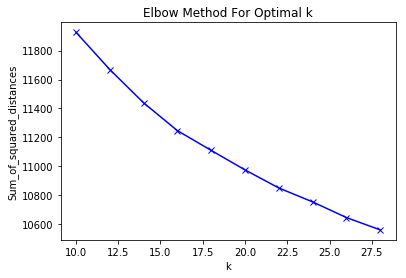

In [26]:
# avgsum = []
# for i in range(0,5):
#     random.shuffle(data)
#     d1 = data[:5000]
#     d2 = data[5000:10000]
#     d3 = data[10000:15000]
#     d4 = data[15000:20000]
#     dlist = [d1, d2, d3, d4]
#     sumsum = []
#     for d in dlist:
#         tvec = TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1,3), stop_words=stop_words, tokenizer=tokenize)#limit max appearance of word 
#         tvs = tvec.fit_transform(dftok['Description'])
#         shp = tvs.shape
#         Sum_of_squared_distances = []
#         K = range(10,30,2)
#         for k in K:
#             km = KMeans(n_clusters=k)
#             km = km.fit(dist)
#             Sum_of_squared_distances.append(km.inertia_)
#         sumsum.append(Sum_of_squared_distances)
#     sumt= np.transpose(sumsum)
#     smta = []
#     for item in sumt:
#         sm = 0
#         for number in item:
#             sm+=number
#         sm = sm/4
#         smta.append(sm)
#     avgsum.append(smta)
# avgt= np.transpose(avgsum)
# avgss = []
# for item in avgt:
#     sm = 0
#     for number in item:
#         sm+=number
#     sm = sm/5
#     avgss.append(sm)
# K =range(10,30,2)
# plt.plot(K, avgss, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

# featname = tvec.get_feature_names()

# lst = [0]*shp[1]
# for item in tvs:
#     lt = item.toarray()[0]
#     for i in range(0,(len(lt))):
#         out = lt[i]+lst[i]
#         lst[i] = out
# for s in range(0,(len(lst))):
#     lst[s] = lst[s]/shp[0]
    
# dic = tvec.vocabulary_
# name = [None]*shp[1]

# for key,value in dic.items():
#     val = int(value)
#     name[val]= key
    



In [128]:
into = []
for u, y in zip(lst, name):
    into.append([y,u])
dfmean = pd.DataFrame(data=into, columns=['Vector', 'Mean TDIDF'])
dfmeanl200 = dfmean.nlargest(1000,'Mean TDIDF')
dfmeanl200.head(1000)
dfmeanl200.to_sql(name='Word_TokenTop1000', con=conn, if_exists='replace')

D:\Anaconda\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [33]:
#begin with clustering based on 5 search, perform elbow function later
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.externals import joblib
tvec = TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1,3), stop_words=stop_words, tokenizer=tokenize)#limit max appearance of word 
tvs = tvec.fit_transform(train_data)
dist = 1 - cosine_similarity(tvs)
km = KMeans(n_clusters=18)
kclus = km.fit(tvs)
joblib.dump(kclus,'kclus.pkl')

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", '``', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


AttributeError: 'tuple' object has no attribute 'lower'

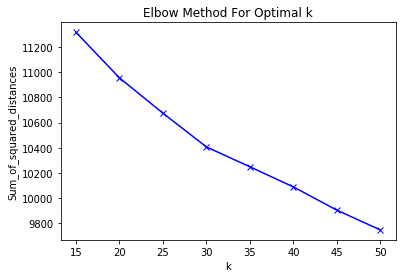

In [24]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
from sklearn.externals import joblib
joblib.dump(kclusd,'kclusdistance.pkl')
joblib.dump(kclus,'kclus.pkl')

NameError: name 'kclusd' is not defined

In [4]:
k5d = joblib.load('kclusdistance.pkl')
clusters = k5d.labels_.tolist()
print(len(clusters))


21187


In [10]:
dfclust = pd.DataFrame()
dfclust['Job Title'] = dfa['Job Title'].copy()
dfclust['Company'] = dfa['Company'].copy()
dfclust['Location'] = dfa['Location'].copy()
dfclust['Cluster'] = clusters
dfclust.head(5)

,Job Title,Company,Location,Cluster
0,Data Analyst - Energy Savings Programs,Ecotagious Inc.,"Vancouver, BC",1
1,Head of Growth,Hostaway,"Toronto, ON",1
2,Field Sales Trainer: Eastern Canada,JUUL Labs,"Toronto, ON",1
3,Cloud Engineer,"Dialpad, Inc.","Vancouver, BC",2
4,SEO/SEM Manager,Patsnap,"Toronto, ON",1


In [11]:
dfclust['Cluster'].value_counts()

0    6408
1    5991
2    5688
3    2947
4     153
Name: Cluster, dtype: int64

In [ ]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'First Cluster', 
                 1: 'Second Cluster', 
                 2: 'Third Cluster', 
                 3: 'Fourth Cluster', 
                 4: 'Fifth Cluster'}
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=dfa['Job Titles'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot